In [247]:
#try to make annual cycle when there ALREADY IS el nino / la nina 

#Classify seasons based on current status: Warm, Cold, Neutral. 
#We average those events... 

#30 JJAs... how many are warm? how many are cold? how many are neutral? 
# 8 warm, 10 cold, 12 neutral -> average warm JJAs, cold JJAs, Neutral JJAs. 
#And then using this data we prepare annual cycle

#WHen there is a warm / cold/ neutral season, -> we are making average mean year, average cold yer, average neural year 
#we call them Warm / Cold / Neutral

#only do this analysis for Nino 3.4 region. 
#Eventually, we consider this with models... 

#Not every event starts at same month -> not yet anomaly, we are using mean values... for SST. 
#explore plotting options, showing annual cycle of Warm / Cold / Neutral. 


In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

obs = pd.read_csv('../Resources/ObsSST.csv')
obs = obs.drop([obs.index[0],obs.index[-1]])
obs = obs[['YR', 'MON', 'NINO3.4','ANOM.3']]
obs['OBS_NINO3.4_L3']=obs['NINO3.4'].rolling(window=3, center=True).mean()
obs['OBS_ANOM_L3']=obs['ANOM.3'].rolling(window=3, center=True).mean()
obs = obs.drop([obs.index[0],obs.index[-1]])
SZN = ['DJF','JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND','NDJ']
obs['SZN'] = SZN * 30
obs = obs[['YR', 'MON', 'SZN', 'OBS_NINO3.4_L3','OBS_ANOM_L3']]
obs.head(20)

,YR,MON,SZN,OBS_NINO3.4_L3,OBS_ANOM_L3
2,1991,1,DJF,27.016667,0.386667
3,1991,2,JFM,27.140000,0.280000
4,1991,3,FMA,27.466667,0.180000
5,1991,4,MAM,27.843333,0.160000
6,1991,5,AMJ,28.153333,0.323333
7,1991,6,MJJ,28.166667,0.513333
8,1991,7,JJA,27.943333,0.653333
9,1991,8,JAS,27.573333,0.620000
10,1991,9,ASO,27.416667,0.653333
11,1991,10,SON,27.540000,0.826667


In [249]:
conditions = [
    (obs['OBS_ANOM_L3'] >= 0.45),
    (obs['OBS_ANOM_L3'] < 0.45) & (obs['OBS_ANOM_L3'] > -0.45),
    (obs['OBS_ANOM_L3'] <= -0.45)
]

phases = ['warm', 'neutral', 'cold']

# Create a new column 'Classification' with the conditions
obs['OBS_PHASE'] = np.select(conditions, phases, default='neutral')
obs['obs_group'] = (obs['OBS_PHASE'] != obs['OBS_PHASE'].shift()).cumsum()

group_lengths = obs.groupby('obs_group').size()
short_groups = group_lengths[group_lengths < 5].index

obs.loc[obs['obs_group'].isin(short_groups) & obs['OBS_PHASE'].isin(['warm', 'cold']), 'OBS_PHASE'] = 'neutral'

obs

,YR,MON,SZN,OBS_NINO3.4_L3,OBS_ANOM_L3,OBS_PHASE,obs_group
2,1991,1,DJF,27.016667,0.386667,neutral,1
3,1991,2,JFM,27.140000,0.280000,neutral,1
4,1991,3,FMA,27.466667,0.180000,neutral,1
5,1991,4,MAM,27.843333,0.160000,neutral,1
6,1991,5,AMJ,28.153333,0.323333,neutral,1
...,...,...,...,...,...,...,...
357,2020,8,JAS,26.380000,-0.573333,cold,46
358,2020,9,ASO,25.870000,-0.893333,cold,46
359,2020,10,SON,25.543333,-1.170000,cold,46
360,2020,11,OND,25.393333,-1.276667,cold,46


In [279]:
# Create separate DataFrames for each phase 
warm_obs = obs[obs['OBS_PHASE'] == 'warm']
neutral_obs = obs[obs['OBS_PHASE'] == 'neutral']
cold_obs = obs[obs['OBS_PHASE'] == 'cold']

# Display the DataFrames
print("Warm Phase:")
print(warm_obs)
print("\nNeutral Phase:")
print(neutral_obs)
print("\nCold Phase:")
print(cold_obs)

Warm Phase:
       YR  MON  DAY  SZN  OBS_NINO3.4_L3  OBS_ANOM_L3 OBS_PHASE  obs_group
7    1991    6   15  MJJ       28.166667     0.513333      warm          2
8    1991    7   15  JJA       27.943333     0.653333      warm          2
9    1991    8   15  JAS       27.573333     0.620000      warm          2
10   1991    9   15  ASO       27.416667     0.653333      warm          2
11   1991   10   15  SON       27.540000     0.826667      warm          2
..    ...  ...  ...  ...             ...          ...       ...        ...
339  2019    2   15  JFM       27.580000     0.723333      warm         42
340  2019    3   15  FMA       27.996667     0.713333      warm         42
341  2019    4   15  MAM       28.336667     0.660000      warm         42
342  2019    5   15  AMJ       28.366667     0.540000      warm         42
343  2019    6   15  MJJ       28.100000     0.450000      warm         42

[92 rows x 8 columns]

Neutral Phase:
       YR  MON  DAY  SZN  OBS_NINO3.4_L3  OBS_ANO

In [251]:
def most_least_common_szn(obs, phase_name):
    value_counts = obs['SZN'].value_counts()
    most_common = value_counts.idxmax()
    least_common = value_counts.idxmin()
    print(f"{phase_name.capitalize()} Phase:")
    print(value_counts)
    print(f"Most common season: {most_common} (count: {value_counts[most_common]})")
    print(f"Least common season: {least_common} (count: {value_counts[least_common]})")
    print()

# Analyze each DataFrame
most_least_common_szn(warm_obs, 'warm')
most_least_common_szn(neutral_obs, 'neutral')
most_least_common_szn(cold_obs, 'cold')

Warm Phase:
SZN
SON    10
OND    10
NDJ    10
DJF    10
ASO     9
JFM     9
FMA     7
MJJ     6
JJA     6
JAS     6
MAM     5
AMJ     4
Name: count, dtype: int64
Most common season: SON (count: 10)
Least common season: AMJ (count: 4)

Neutral Phase:
SZN
AMJ    22
MJJ    19
MAM    18
JJA    18
JAS    15
FMA    13
ASO    12
JFM    11
DJF    10
SON    10
OND     8
NDJ     8
Name: count, dtype: int64
Most common season: AMJ (count: 22)
Least common season: OND (count: 8)

Cold Phase:
SZN
OND    12
NDJ    12
SON    10
DJF    10
JFM    10
FMA    10
JAS     9
ASO     9
MAM     7
JJA     6
MJJ     5
AMJ     4
Name: count, dtype: int64
Most common season: OND (count: 12)
Least common season: AMJ (count: 4)



In [252]:
def mean_anomaly_by_szn(obs, phase_name):
    mean_values = obs.groupby('SZN')['OBS_NINO3.4_L3'].mean().reindex(['JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ', 'DJF'])
    mean_obs = pd.DataFrame(mean_values).reset_index()
    mean_obs.columns = ['SZN', 'OBS_MEAN_NINO3.4_L3']
    print(f"{phase_name.capitalize()} Phase:")
    print(mean_obs)
    print()
    return mean_obs

warm_mean_obs = mean_anomaly_by_szn(warm_obs, 'warm')
neutral_mean_obs = mean_anomaly_by_szn(neutral_obs, 'neutral')
cold_mean_obs = mean_anomaly_by_szn(cold_obs, 'cold')



Warm Phase:
    SZN  OBS_MEAN_NINO3.4_L3
0   JFM            27.960741
1   FMA            28.285714
2   MAM            28.558000
3   AMJ            28.587500
4   MJJ            28.392222
5   JJA            28.188333
6   JAS            28.041111
7   ASO            27.774815
8   SON            27.849333
9   OND            27.986000
10  NDJ            27.969333
11  DJF            27.873667

Neutral Phase:
    SZN  OBS_MEAN_NINO3.4_L3
0   JFM            26.867273
1   FMA            27.372051
2   MAM            27.722963
3   AMJ            27.841818
4   MJJ            27.610877
5   JJA            27.260000
6   JAS            27.011333
7   ASO            26.742222
8   SON            26.657333
9   OND            26.648333
10  NDJ            26.560000
11  DJF            26.583000

Cold Phase:
    SZN  OBS_MEAN_NINO3.4_L3
0   JFM            25.861000
1   FMA            26.470333
2   MAM            26.935238
3   AMJ            26.979167
4   MJJ            26.914667
5   JJA            26.490000
6 

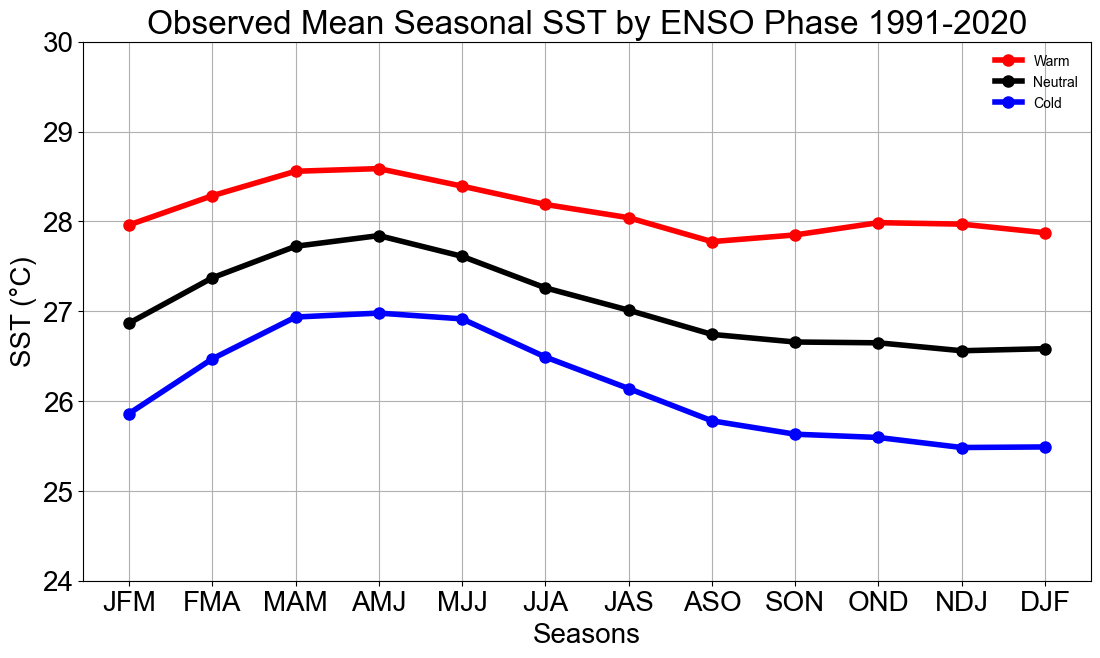

In [297]:
def anomaly_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(warm_mean_obs['SZN'], warm_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'Warm')
    plt.plot(neutral_mean_obs['SZN'], neutral_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'Neutral')
    plt.plot(cold_mean_obs['SZN'], cold_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='blue', label = 'Cold')
    

    
    # Customize the plot
    plt.title(f'Observed Mean Seasonal SST by ENSO Phase 1991-2020', size = 24)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax = 30)
    #plt.savefig(f'../Plots/Obs/warm_anomaly_mean.png', format='png')
    # Show the plot
    plt.show()

anomaly_visualizer()

warm_mean_obs.to_csv('../Resources/warm_mean_obs.csv', index=False)
neutral_mean_obs.to_csv('../Resources/neutral_mean_obs.csv', index=False)
cold_mean_obs.to_csv('../Resources/cold_mean_obs.csv', index=False)



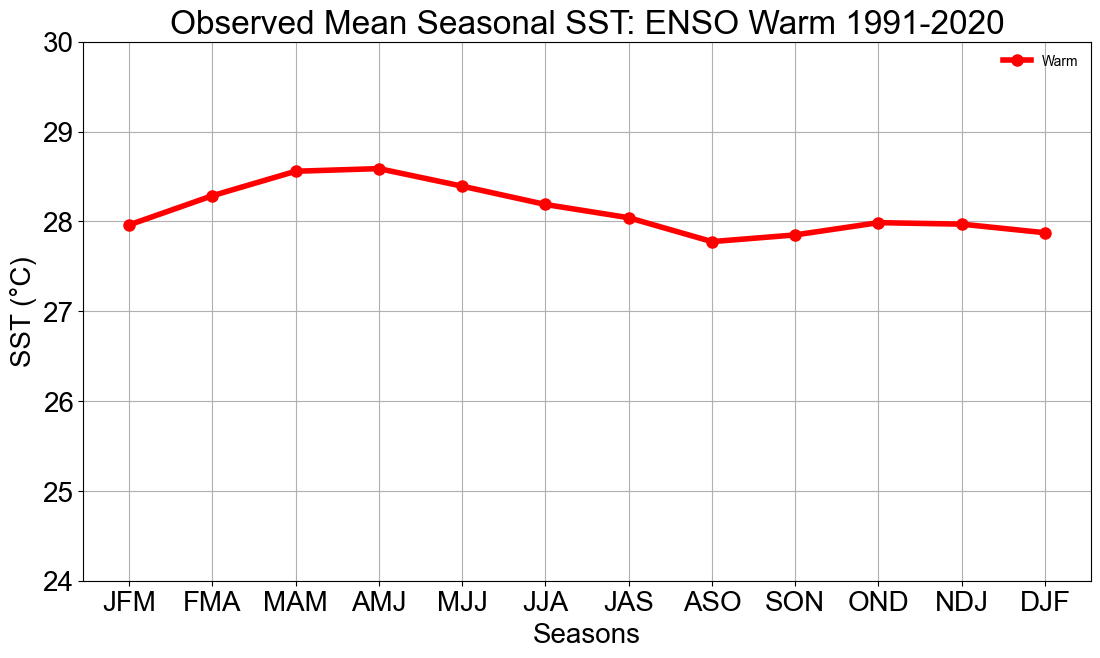

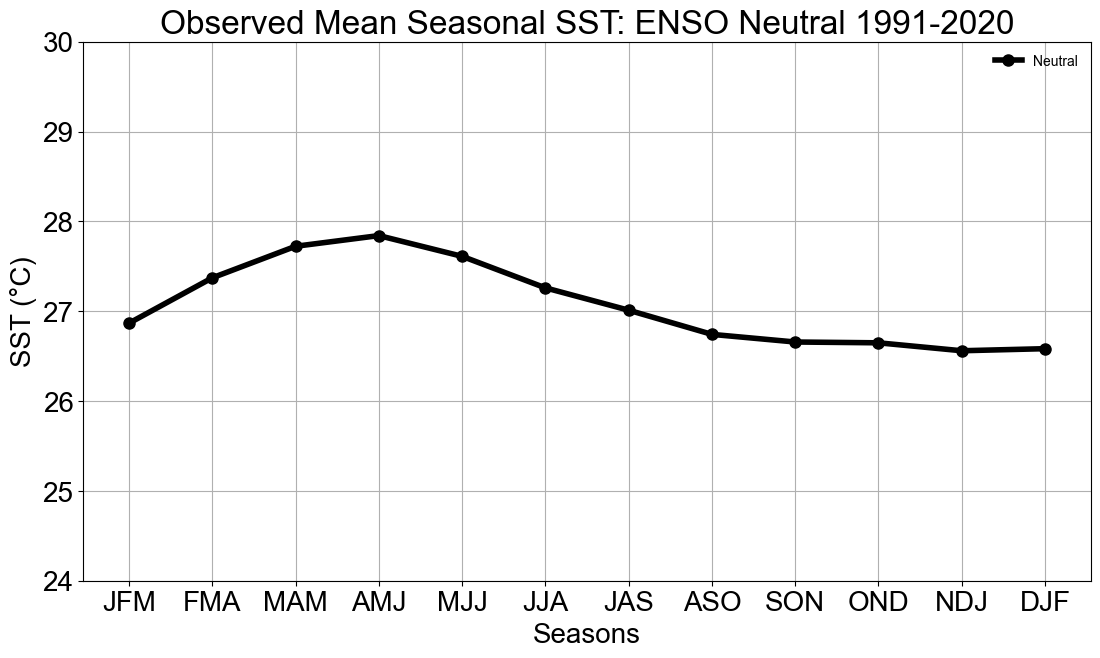

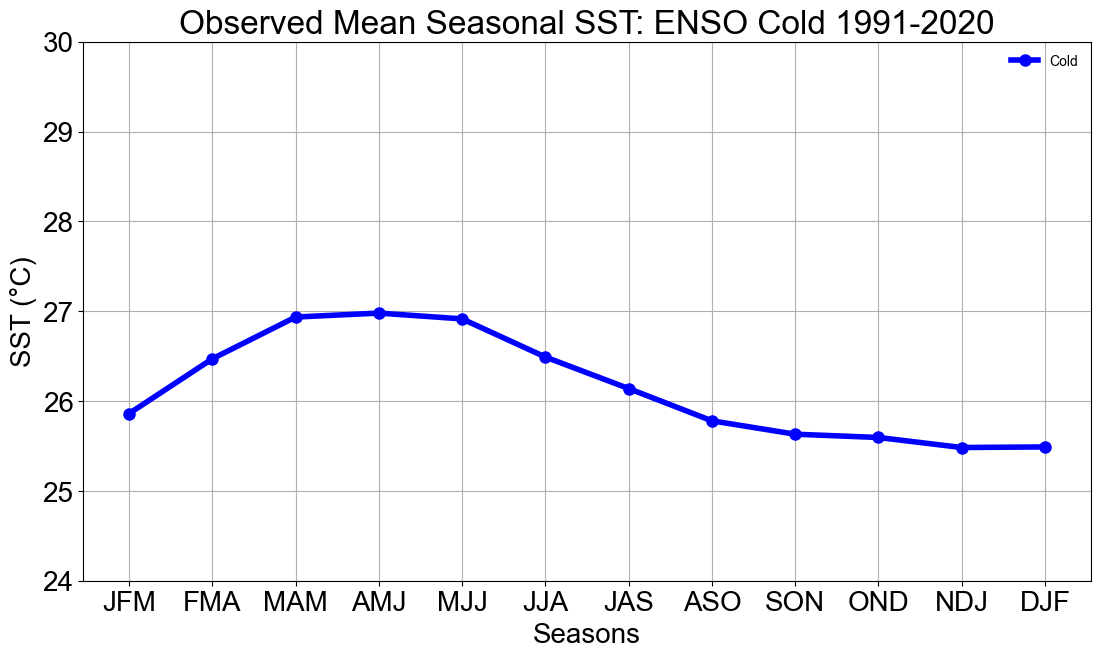

In [254]:
def warm_anomaly_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(warm_mean_obs['SZN'], warm_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'Warm')
    
    # Customize the plot
    plt.title(f'Observed Mean Seasonal SST: ENSO Warm 1991-2020', size = 24)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax = 30)
    #plt.savefig(f'../Plots/Obs/warm_anomaly_mean.png', format='png')
    # Show the plot
    plt.show()

def neutral_anomaly_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(neutral_mean_obs['SZN'],neutral_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'Neutral')
    
    # Customize the plot
    plt.title(f'Observed Mean Seasonal SST: ENSO Neutral 1991-2020', size = 24)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax = 30)
    #plt.savefig(f'../Plots/Obs/neutral_anomaly_mean.png', format='png')
    # Show the plot
    plt.show()

def cold_anomaly_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(cold_mean_obs['SZN'], cold_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='blue', label = 'Cold')
    
    # Customize the plot
    plt.title(f'Observed Mean Seasonal SST: ENSO Cold 1991-2020', size = 24)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax = 30)
    #plt.savefig(f'../Plots/Obs/cold_anomaly_mean.png', format='png')
    # Show the plot
    plt.show()

visualizer_functions = {
    'warm': warm_anomaly_visualizer,
    'neutral': neutral_anomaly_visualizer,
    'cold': cold_anomaly_visualizer,
}

# Higher-level function to call the appropriate visualizer function
def run_visualizer(phase):
    if phase in visualizer_functions:
        visualizer_function = visualizer_functions[phase]
        visualizer_function()
    else:
        print(f"Error: Phase {phase} is not recognized. Valid regions are {list(visualizer_functions.keys())}.")

phases = ['warm', 'neutral', 'cold']

for phase in phases:
    run_visualizer(phase)

#create boxplots or stripplots for this data. This graph is the mean, and we want to see the RANGE of data. 


In [255]:
#model data 
#follow the convention found at
#origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php
#except... make sure to include the fringe -0.4 values in nina that occur in between fields of blue 

cpc = pd.read_csv('../Resources/EnsoOnset.csv')
cpc

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
0,1991,0.4,0.3,0.2,0.3,0.5,0.6,0.7,0.6,0.6,0.8,1.2,1.5
1,1992,1.7,1.6,1.5,1.3,1.1,0.7,0.4,0.1,-0.1,-0.2,-0.3,-0.1
2,1993,0.1,0.3,0.5,0.7,0.7,0.6,0.3,0.3,0.2,0.1,0.0,0.1
3,1994,0.1,0.1,0.2,0.3,0.4,0.4,0.4,0.4,0.6,0.7,1.0,1.1
4,1995,1.0,0.7,0.5,0.3,0.1,0.0,-0.2,-0.5,-0.8,-1.0,-1.0,-1.0
5,1996,-0.9,-0.8,-0.6,-0.4,-0.3,-0.3,-0.3,-0.3,-0.4,-0.4,-0.4,-0.5
6,1997,-0.5,-0.4,-0.1,0.3,0.8,1.2,1.6,1.9,2.1,2.3,2.4,2.4
7,1998,2.2,1.9,1.4,1.0,0.5,-0.1,-0.8,-1.1,-1.3,-1.4,-1.5,-1.6
8,1999,-1.5,-1.3,-1.1,-1.0,-1.0,-1.0,-1.1,-1.1,-1.2,-1.3,-1.5,-1.7
9,2000,-1.7,-1.4,-1.1,-0.8,-0.7,-0.6,-0.6,-0.5,-0.5,-0.6,-0.7,-0.7


In [256]:
cpc_long = pd.melt(cpc, id_vars=["Year"], var_name="SZN", value_name="NINO3.4_L3")

# Extract month number from season abbreviation
season_to_month = {
    "DJF": 1, "JFM": 2, "FMA": 3, "MAM": 4, "AMJ": 5, "MJJ": 6,
    "JJA": 7, "JAS": 8, "ASO": 9, "SON": 10, "OND": 11, "NDJ": 12
}
cpc_long["MON"] = cpc_long["SZN"].map(season_to_month)

# Create the ANOM_L3 column (assuming it should be the same as NINO3.4_L3 for this example)
cpc_long["CPC_ANOM_L3"] = cpc_long["NINO3.4_L3"]

# Sort the DataFrame by Year and Month
cpc_long = cpc_long.sort_values(by=["Year", "MON"])
cpc_long['YR'] = cpc_long['Year']


# Display the result
cpc_long.reset_index(drop=True, inplace=True)
cpc_long = cpc_long[['YR', 'MON', 'SZN','CPC_ANOM_L3']]
cpc_long

,YR,MON,SZN,CPC_ANOM_L3
0,1991,1,DJF,0.4
1,1991,2,JFM,0.3
2,1991,3,FMA,0.2
3,1991,4,MAM,0.3
4,1991,5,AMJ,0.5
...,...,...,...,...
355,2020,8,JAS,-0.6
356,2020,9,ASO,-0.9
357,2020,10,SON,-1.2
358,2020,11,OND,-1.3


In [257]:
conditions = [
    (cpc_long['CPC_ANOM_L3'] >= 0.5),
    (cpc_long['CPC_ANOM_L3'] < 0.5) & (cpc_long['CPC_ANOM_L3'] > -0.5),
    (cpc_long['CPC_ANOM_L3'] <= -0.5)
]

phases = ['warm', 'neutral', 'cold']

# Create a new column 'Classification' with the conditions
cpc_long['CPC_PHASE'] = np.select(conditions, phases, default='neutral')
cpc_long['cpc_group'] = (cpc_long['CPC_PHASE'] != cpc_long['CPC_PHASE'].shift()).cumsum()

group_lengths = cpc_long.groupby('cpc_group').size()
short_groups = group_lengths[group_lengths < 5].index

cpc_long.loc[cpc_long['cpc_group'].isin(short_groups) & cpc_long['CPC_PHASE'].isin(['warm', 'cold']), 'CPC_PHASE'] = 'neutral'

cpc_long.tail(50)

,YR,MON,SZN,CPC_ANOM_L3,CPC_PHASE,cpc_group
310,2016,11,OND,-0.7,cold,38
311,2016,12,NDJ,-0.6,cold,38
312,2017,1,DJF,-0.3,neutral,39
313,2017,2,JFM,-0.2,neutral,39
314,2017,3,FMA,0.1,neutral,39
315,2017,4,MAM,0.2,neutral,39
316,2017,5,AMJ,0.3,neutral,39
317,2017,6,MJJ,0.3,neutral,39
318,2017,7,JJA,0.1,neutral,39
319,2017,8,JAS,-0.1,neutral,39


In [258]:
# Create separate DataFrames for each phase 
warm_cpc_long = cpc_long[cpc_long['CPC_PHASE'] == 'warm']
neutral_cpc_long = cpc_long[cpc_long['CPC_PHASE'] == 'neutral']
cold_cpc_long = cpc_long[cpc_long['CPC_PHASE'] == 'cold']

# Display the DataFrames
print("Warm Phase:")
print(warm_cpc_long)
print("\nNeutral Phase:")
print(neutral_cpc_long)
print("\nCold Phase:")
print(cold_cpc_long)

most_least_common_szn(warm_cpc_long, 'warm')
most_least_common_szn(neutral_cpc_long, 'neutral')
most_least_common_szn(cold_cpc_long, 'cold')

#warm_mean_cpc_long = mean_anomaly_by_szn(warm_cpc_long, 'warm')
#neutral_mean_cpc_long = mean_anomaly_by_szn(neutral_cpc_long, 'neutral')
#cold_mean_cpc_long = mean_anomaly_by_szn(cold_cpc_long, 'cold')

Warm Phase:
       YR  MON  SZN  CPC_ANOM_L3 CPC_PHASE  cpc_group
4    1991    5  AMJ          0.5      warm          2
5    1991    6  MJJ          0.6      warm          2
6    1991    7  JJA          0.7      warm          2
7    1991    8  JAS          0.6      warm          2
8    1991    9  ASO          0.6      warm          2
..    ...  ...  ...          ...       ...        ...
337  2019    2  JFM          0.7      warm         42
338  2019    3  FMA          0.7      warm         42
339  2019    4  MAM          0.7      warm         42
340  2019    5  AMJ          0.5      warm         42
341  2019    6  MJJ          0.5      warm         42

[94 rows x 6 columns]

Neutral Phase:
       YR  MON  SZN  CPC_ANOM_L3 CPC_PHASE  cpc_group
0    1991    1  DJF          0.4   neutral          1
1    1991    2  JFM          0.3   neutral          1
2    1991    3  FMA          0.2   neutral          1
3    1991    4  MAM          0.3   neutral          1
18   1992    7  JJA          0.

In [259]:
merged_onset = pd.merge(obs, cpc_long, on=['YR','MON','SZN'])
merged_onset = merged_onset[['YR', 'MON', 'SZN','OBS_ANOM_L3', 'OBS_PHASE','obs_group','CPC_ANOM_L3', 'CPC_PHASE', 'cpc_group']]
merged_onset.to_csv('../Resources/merged_onset.csv', index=False)
merged_onset

,YR,MON,SZN,OBS_ANOM_L3,OBS_PHASE,obs_group,CPC_ANOM_L3,CPC_PHASE,cpc_group
0,1991,1,DJF,0.386667,neutral,1,0.4,neutral,1
1,1991,2,JFM,0.280000,neutral,1,0.3,neutral,1
2,1991,3,FMA,0.180000,neutral,1,0.2,neutral,1
3,1991,4,MAM,0.160000,neutral,1,0.3,neutral,1
4,1991,5,AMJ,0.323333,neutral,1,0.5,warm,2
...,...,...,...,...,...,...,...,...,...
355,2020,8,JAS,-0.573333,cold,46,-0.6,cold,46
356,2020,9,ASO,-0.893333,cold,46,-0.9,cold,46
357,2020,10,SON,-1.170000,cold,46,-1.2,cold,46
358,2020,11,OND,-1.276667,cold,46,-1.3,cold,46


In [265]:
obs['DAY'] = 15
obs = obs[['YR', 'MON', 'DAY' , 'SZN', 'OBS_NINO3.4_L3', 'OBS_ANOM_L3', 'OBS_PHASE', 'obs_group']]
obs.to_csv('../Resources/observed_onset.csv', index=False)
obs.head(10)

,YR,MON,DAY,SZN,OBS_NINO3.4_L3,OBS_ANOM_L3,OBS_PHASE,obs_group
2,1991,1,15,DJF,27.016667,0.386667,neutral,1
3,1991,2,15,JFM,27.140000,0.280000,neutral,1
4,1991,3,15,FMA,27.466667,0.180000,neutral,1
5,1991,4,15,MAM,27.843333,0.160000,neutral,1
6,1991,5,15,AMJ,28.153333,0.323333,neutral,1
7,1991,6,15,MJJ,28.166667,0.513333,warm,2
8,1991,7,15,JJA,27.943333,0.653333,warm,2
9,1991,8,15,JAS,27.573333,0.620000,warm,2
10,1991,9,15,ASO,27.416667,0.653333,warm,2
11,1991,10,15,SON,27.540000,0.826667,warm,2


In [267]:
import seaborn as sns
warm_obs

,YR,MON,SZN,OBS_NINO3.4_L3,OBS_ANOM_L3,OBS_PHASE,obs_group
7,1991,6,MJJ,28.166667,0.513333,warm,2
8,1991,7,JJA,27.943333,0.653333,warm,2
9,1991,8,JAS,27.573333,0.620000,warm,2
10,1991,9,ASO,27.416667,0.653333,warm,2
11,1991,10,SON,27.540000,0.826667,warm,2
...,...,...,...,...,...,...,...
339,2019,2,JFM,27.580000,0.723333,warm,42
340,2019,3,FMA,27.996667,0.713333,warm,42
341,2019,4,MAM,28.336667,0.660000,warm,42
342,2019,5,AMJ,28.366667,0.540000,warm,42


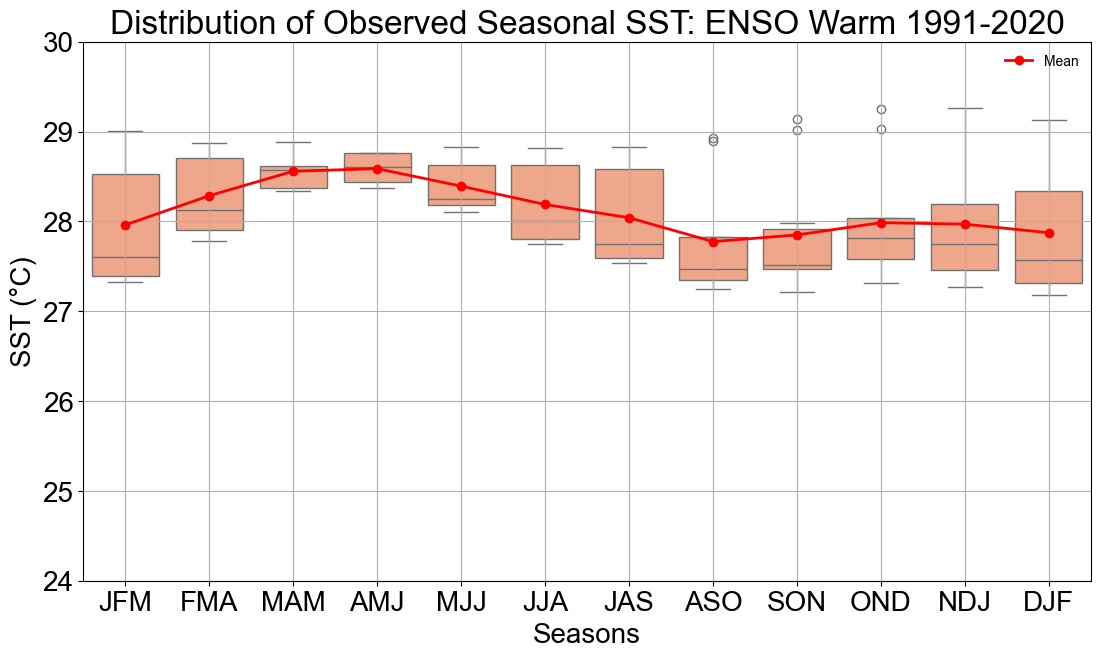

<Figure size 1200x600 with 0 Axes>

In [290]:
def warm_phase_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(warm_mean_obs['SZN'], warm_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=6, linewidth=2, linestyle='-', color='red', label = 'Mean', zorder=2)
    sns.boxplot(x='SZN', y='OBS_NINO3.4_L3', data=warm_obs, color = 'lightsalmon', zorder=1)
    # Customize the plot
    plt.title(f'Distribution of Observed Seasonal SST: ENSO Warm 1991-2020', size = 24)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax = 30)
    plt.savefig(f'../Plots/Obs/warm_distribution_and_mean.png', format='png')
    # Show the plot
    plt.show()

    plt.figure(figsize=(12, 6))
warm_phase_visualizer()


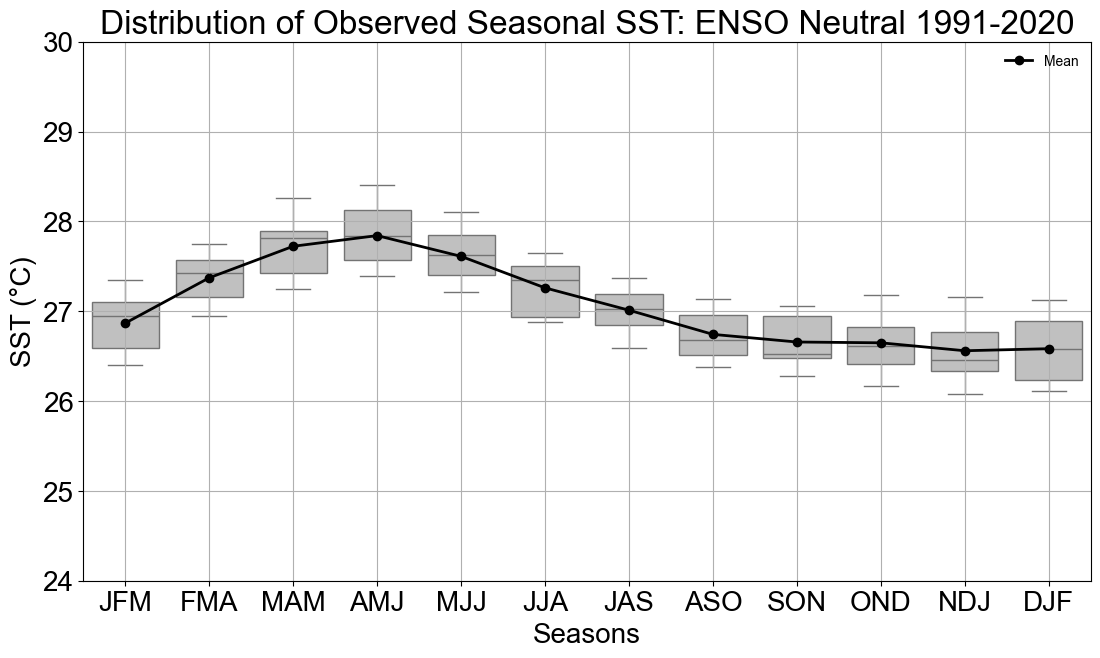

In [294]:
def neutral_phase_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(neutral_mean_obs['SZN'],neutral_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=6, linewidth=2, linestyle='-', color='black', label = 'Mean',  zorder=2)
    sns.boxplot(x='SZN', y='OBS_NINO3.4_L3', data=neutral_obs, color = 'silver', zorder=1)
    # Customize the plot
    plt.title(f'Distribution of Observed Seasonal SST: ENSO Neutral 1991-2020', size = 24)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax = 30)
    plt.savefig(f'../Plots/Obs/neutral_distribution_and_mean.png', format='png')
    # Show the plot
    plt.show()
neutral_phase_visualizer()




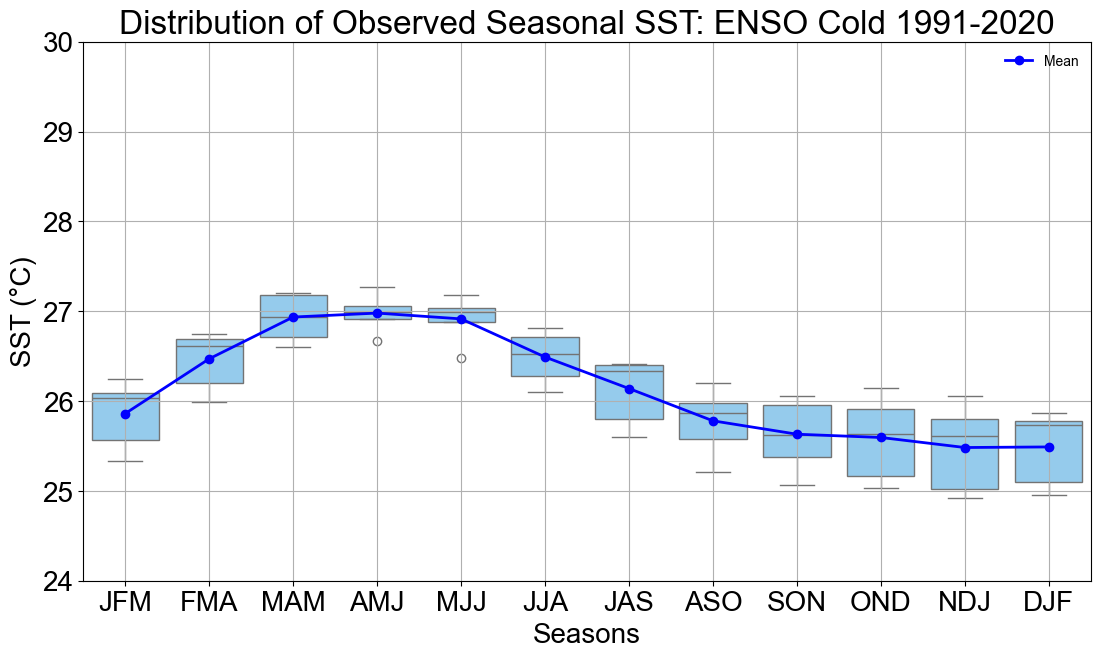

In [296]:
def cold_phase_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(cold_mean_obs['SZN'],cold_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=6, linewidth=2, linestyle='-', color='blue', label = 'Mean',  zorder=2)
    sns.boxplot(x='SZN', y='OBS_NINO3.4_L3', data=cold_obs, color = 'lightskyblue', zorder=1)
    # Customize the plot
    plt.title(f'Distribution of Observed Seasonal SST: ENSO Cold 1991-2020', size = 24)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax = 30)
    plt.savefig(f'../Plots/Obs/cold_distribution_and_mean.png', format='png')
    # Show the plot
    plt.show()
cold_phase_visualizer()